In [1]:
import joblib
import numpy as np
from DimensionReduction import t_SNE, get_pca
from Utils import get_color, draw_scatter
import math
from ReadData import read_from_mat
import matplotlib.pyplot as plt

In [2]:
# Gene Expression Matrix
GEM = joblib.load('datasets/Chu_cell_type.pkl').T.astype(np.float64)
print(GEM.shape)
# Genes
genes = joblib.load('datasets/Chu_cell_type_genes.pkl')
print(len(genes))
# Cell Type Labels
labels = joblib.load('datasets/Chu_cell_type_labels.pkl')
print(len(labels))

(19097, 1018)
19097
1018


In [3]:
# Preprocession of GEM
GEM_P = []
genes_P = []
idx = 0
for gene in GEM:
    gene = np.array(gene)
    if len(gene[gene>0]) >= 10:
        GEM_P.append(gene)
        genes_P.append(genes[idx])
    idx += 1
        
GEM_P = np.array(GEM_P)
print(GEM_P.shape)
print(len(genes_P))

(16619, 1018)
16619


In [ ]:
dim_data, ratio, result = get_pca(GEM_P.T, c=20, with_normalize=True)
dim_data = t_SNE(dim_data, perp=30, with_normalize=True)
x = [i[0] for i in dim_data]
y = [i[1] for i in dim_data]
default_colors = ['c', 'b', 'g', 'r', 'm', 'y', 'k']
colors = get_color(labels, default_colors)
draw_scatter(x, y, labels, colors)

In [4]:
print(genes_P.index('POU5F1'))
print(genes_P.index('GATA6'))

2357
6394


In [ ]:
# Scatter of gene GATA6 and POU5F1

G_x = []
G_y = []

for cell in GEM_P.T:
    if float(cell[6394]) > 0:
        G_x.append(math.log10(float(cell[6394])))
    else:
        G_x.append(-1)
    if float(cell[2357]) > 0:
        G_y.append(math.log10(float(cell[2357])))
    else:
        G_y.append(-1)

draw_scatter(G_x, G_y, labels, colors)

In [ ]:
n, n_genes = GEM_P.T.shape
nxk = int(0.1 * n)
nyk = int(0.1 * n)
GATA6 = GEM_P[6394]
POU5F1 = GEM_P[2357]
significant_level = 0.01

mu_xyk = 0

nxy_arr = []
edge_arr = []
ro_arr = []

print(GATA6)
for cell_index in range(1):
    
    # 计算当前细胞各个基因与目标基因的距离
    GATA6_DIS = [abs(i - GATA6[cell_index]) for i in GATA6]
    POU5F1_DIS = [abs(i - POU5F1[cell_index]) for i in POU5F1]
    
    # 对距离进行排序，获得排序后的索引
    GATA6_NN = np.argsort(GATA6_DIS)
    POU5F1_NN = np.argsort(POU5F1_DIS)
    
    # 寻找k近邻并计算nxyk
    GATA6_KNN = []
    POU5F1_KNN = []
    kx = 0
    ky = 0
    for i in range(1, 1018):
        if kx <= nxk:
            GATA6_KNN.append(GATA6_NN[i])
        if ky <= nyk:
            POU5F1_KNN.append(POU5F1_NN[i])
        if GATA6_DIS[GATA6_NN[i]] != 0:
            kx += 1
        if POU5F1_NN[POU5F1_NN[i]] != 0:
            ky += 1
        if kx > nxk and ky > nyk:
            break

    print(kx, ky)
    print(nxyk)
    nxyk = len([x for x in POU5F1_KNN if x in GATA6_KNN])
    ro_xyk = nxyk / n - (kx / n) * (ky / n)
    sigma_xyk = math.sqrt((kx * ky * (n - kx) * (n - ky))/(n * n * n * n * (n - 1)))
    roxyk_hat = (ro_xyk - mu_xyk) / sigma_xyk
    
    if roxyk_hat > significant_level:
        edge_xyk = 1
    else:
        edge_xyk = 0
    
    nxy_arr.append(nxyk)
    edge_arr.append(edge_xyk)
    ro_arr.append(roxyk_hat)

#print(np.array(ro_arr).shape)
print(ro_arr)

In [13]:
n, n_genes = GEM_P.T.shape
nxk = int(0.1 * n)
nyk = int(0.1 * n)
GATA6 = GEM_P[6394]
POU5F1 = GEM_P[2357]
significant_level = 0.01

mu_xyk = 0

nxy_arr = []
kx_arr = []
ky_arr = []
edge_arr = []
ro = []
ro_arr = []

for cell_index in range(n):

    GATA6_DIS = [abs(i - GATA6[cell_index]) for i in GATA6]
    POU5F1_DIS = [abs(i - POU5F1[cell_index]) for i in POU5F1]
    GATA6_NN = np.argsort(GATA6_DIS)
    POU5F1_NN = np.argsort(POU5F1_DIS)
    GATA6_KNN = []
    POU5F1_KNN = []
    kx = 0
    ky = 0
    for i in range(1, 1018):
        if kx <= nxk:
            GATA6_KNN.append(GATA6_NN[i])
        if ky <= nyk:
            POU5F1_KNN.append(POU5F1_NN[i])
        if GATA6_DIS[GATA6_NN[i]] != 0:
            kx += 1
        if POU5F1_NN[POU5F1_NN[i]] != 0:
            ky += 1
        if kx > nxk and ky > nyk:
            break

    nxyk = len([x for x in POU5F1_KNN if x in GATA6_KNN])
    ro_xyk = nxyk / n - (kx / n) * (ky / n)
    
    
    kx_arr.append(kx)
    ky_arr.append(ky)
    nxy_arr.append(nxyk)
    ro.append(ro_xyk)

mu_xyk = np.mean(ro)
for i in range(n):
    kx = kx_arr[i]
    ky = ky_arr[i]
    nxyk = nxy_arr[i]
    ro_xyk = nxyk / n - (kx / n) * (ky / n)
    sigma_xyk = math.sqrt((kx * ky * (n - kx) * (n - ky))/(n * n * n * n * (n - 1)))
    roxyk_hat = (ro_xyk - mu_xyk) / sigma_xyk
    if roxyk_hat > significant_level:
        edge_xyk = 1
    else:
        edge_xyk = 0
    edge_arr.append(edge_xyk)
    ro_arr.append(roxyk_hat)
    
    
print(mu_xyk)
print(ro_arr)

0.0016746247612148813
[2.4682806601953455, 2.4924611807909978, 2.4924611807909978, 0.005077449343650405, 2.13712064772709, -4.259008947423229, 2.13712064772709, -3.548327881295414, 2.4924611807909978, 2.13712064772709, 2.4924611807909978, 2.4924611807909978, 2.13712064772709, -0.7056036167841595, 0.3263243654476923, -2.1269657490397895, -3.548327881295414, -2.1269657490397895, -3.1929873482315116, 0.7157585154714653, 2.4924611807909978, 2.13712064772709, 2.4924611807909978, 2.13712064772709, 2.4924611807909978, -2.1269657490397895, 2.13712064772709, -2.1269657490397895, 2.13712064772709, 1.0710990485353729, 2.13712064772709, 2.8478017138549054, 2.8478017138549054, -3.548327881295414, 2.13712064772709, -2.482306282103697, -3.548327881295414, -1.4162846829119746, -4.259008947423229, -1.4162846829119746, 2.4924611807909978, 2.111287944404069, 2.111287944404069, -1.771625215975882, 2.13712064772709, 0.005077449343650405, 1.4264395815992803, -2.482306282103697, -4.259008947423229, -3.548327

In [ ]:
# 会让内存爆炸，但能得到所有细胞的CSN
n, n_genes = GEM_P.T.shape
nxk = int(0.1 * n)
nyk = int(0.1 * n)
mu_xyk = 0
sigma_xyk = math.sqrt((nxk * nyk * (n - nxk) * (n - nyk))/(n * n * n * n * (n - 1)))
gignificant_level = 0.01

CSN = np.zeros((1, n_genes, n_genes))
NDM = np.zeros((n_genes, n))

for x in range(n_genes):
    for y in range(x+1, n_genes):
        if x == y:
            continue
        for k in range(1):
            gene_x_dis = [abs(_ - GEM_P[x][k]) for _ in GEM_P[x]]
            gene_y_dis = [abs(_ - GEM_P[y][k]) for _ in GEM_P[y]]
            gene_x_knn = np.argsort(gene_x_dis)[1:nxk+1]
            gene_y_knn = np.argsort(gene_y_dis)[1:nyk+1]
            nxyk = len([x for x in gene_x_knn if x in gene_y_knn])
            ro_xyk = nxyk / n - (nxk / n) * (nyk / n)
            roxyk_hat = (ro_xyk - mu_xyk) / sigma_xyk
            if roxyk_hat > gignificant_level:
                edge_xyk = 1
            else:
                edge_xyk = 0
            CSN[k][x][y] = edge_xyk
            
print(CSN)

In [ ]:
# 内存不爆，但只能得到最终的 NDM
n, n_genes = GEM_P.T.shape
nxk = int(0.1 * n)
nyk = int(0.1 * n)
mu_xyk = 0
sigma_xyk = math.sqrt((nxk * nyk * (n - nxk) * (n - nyk))/(n * n * n * n * (n - 1)))
significant_level = 0.01

NDM = np.zeros((n_genes, n))

for k in range(n):
    single_cell_CSN = np.zeros((n_genes, n_genes))
    for x in range(n_genes):
        for y in range(x+1, n_genes):
            if x == y:
                continue
            gene_x_dis = [abs(_ - GEM_P[x][k]) for _ in GEM_P[x]]
            gene_y_dis = [abs(_ - GEM_P[y][k]) for _ in GEM_P[y]]
            gene_x_knn = np.argsort(gene_x_dis)[1:nxk+1]
            gene_y_knn = np.argsort(gene_y_dis)[1:nyk+1]
            nxyk = len([x for x in gene_x_knn if x in gene_y_knn])
            ro_xyk = nxyk / n - (nxk / n) * (nyk / n)
            roxyk_hat = (ro_xyk - mu_xyk) / sigma_xyk

            edge_xyk = 0
            if roxyk_hat > significant_level:
                edge_xyk = 1
                
            single_cell_CSN[x][y] = edge_xyk
    
    for x in range(n_genes):
        NDM[x][k] = sum(single_cell_CSN[x])
    print(k)
             
print(NDM)

(16619, 1018)


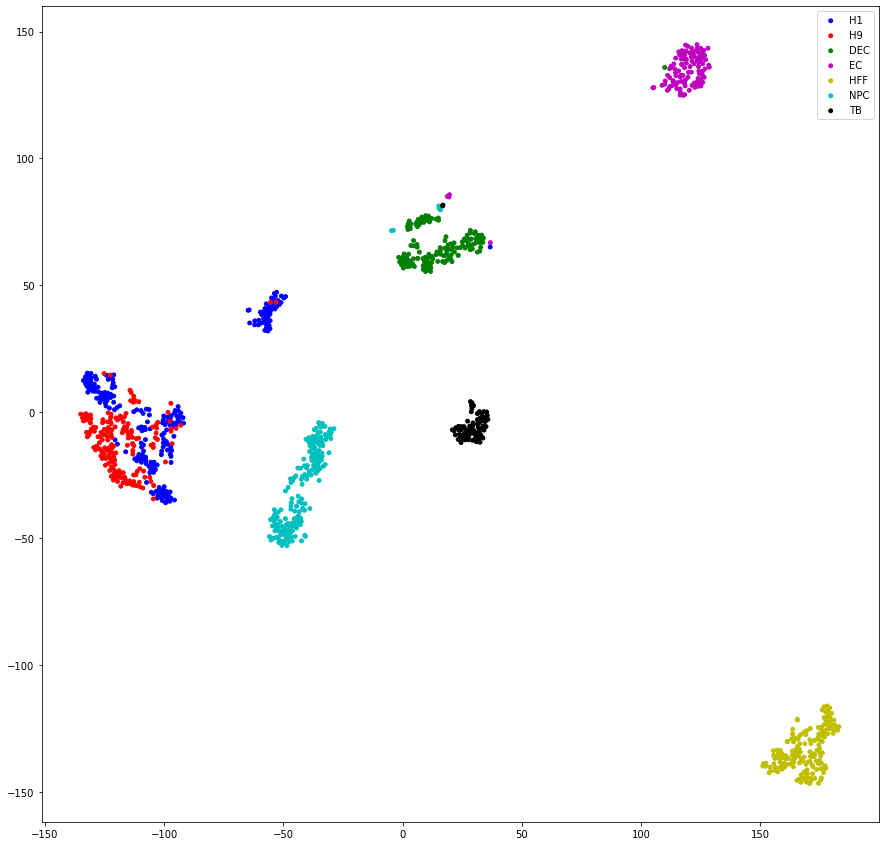

In [8]:
data = read_from_mat('data/NDM.mat')
print(data['ans'].shape)
dim_data, ratio, result = get_pca(data['ans'].T, c=20, with_normalize=False)
dim_data = t_SNE(dim_data, perp=30, with_normalize=False)
x = [i[0] for i in dim_data]
y = [i[1] for i in dim_data]
default_colors = ['b', 'r', 'g', 'm', 'y','c', 'k']
colors = get_color(labels, default_colors)
draw_scatter(x, y, labels, colors)

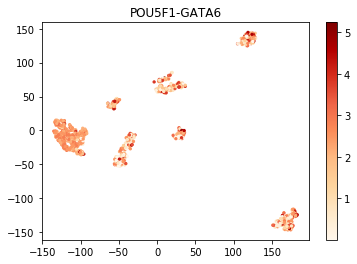

In [12]:

plt.scatter(x, y, c=ro_arr, s=5, cmap='OrRd')
plt.colorbar()
plt.title('POU5F1-GATA6')
plt.show()

In [ ]:
plt.scatter(x, y, c=ro_arr, s=5, cmap='OrRd')
plt.colorbar()
plt.title('FBXO33-KDR')
plt.show()

In [ ]:
plt.scatter(x, y, c=ro_arr, s=5, cmap='OrRd')
plt.colorbar()
plt.title('ZHX2-PECAM1')
plt.show()

In [ ]:
data = read_from_mat('data/NDM.mat')
print(data['ans'].shape)
dim_data, ratio, result = get_pca(data['ans'].T, c=20, with_normalize=True)
dim_data = t_SNE(dim_data, perp=30, with_normalize=True)
x = [i[0] for i in dim_data]
y = [i[1] for i in dim_data]
default_colors = ['b', 'r', 'g', 'm', 'y','c', 'k']
colors = get_color(labels, default_colors)
draw_scatter(x, y, labels, colors)